# <center> Investigate a TMDb movie Database </center> <br>

### <div style="text-align: right"> By Jinsoo Philip Kim </div> <br>

### <center> Table of Contents </center>

### 1. Introduction
### 2. Hypotheses
### 3. Data Wrangling
1) Change column name from budget, revenue to budget(USD), revenue(USD)  
2) Remove data that budget or revenue are '0'.  
3) Remove duplicated data.  
4) Remove irrelevant columns.  
   No needed: id, imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, production_companies  
   Not trusted: popularity, vote_count, vote_average
5) Enhance readability of release_date.  

### 4. Exploratory Data Analysis
1) Which genre is released the most?  
2) Which month is the released the most?  
3) Which movie make the profit most?  
4) Which movie make the revenue most?  
5) How much is the average profit per movie by year?  
6) How is the runtime distributed?  

### 5. Conclusion
### 6. Limitations


***
## 1. Introduction

TMDb movie database is a collection of more than 10,000 movies and including 21 columns. By investigating this database I'd like to find meaningful data.


In [434]:
# import libraries
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# read tmdb csv file.
df = pd.read_csv('tmdb-movies.csv')
df_copy = df.copy() # I will keep the df and use df_copy instead for analysis.

In [435]:
df_copy.head(1) # Let's see how it looks like.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [436]:
(row, col) = df_copy.shape

# Let's see the size of data.
print("We have {} movies(rows) and {} columnes to analyze.".format(row - 1, col))

We have 10865 movies(rows) and 21 columnes to analyze.


***
## 2. Hypotheses
1) If one or more of information about a movie is erroneous, consider the whole info is wrong for that movie.  
2) some column information are not trustworthy.

***
## 3. Data wrangling
For better analysis, data wrangling is preceded.


### 1) Change column names

In [437]:
df_wrangled = df_copy.copy()

# Rename columns and check
df_wrangled = df_wrangled.rename(columns={'budget': 'budget(USD)', 'revenue': 'revenue(USD)'})
df_wrangled.head(1)

,id,imdb_id,popularity,budget(USD),revenue(USD),original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 2) Remove the rows with budget = 0 or revenue = 0
Check first there exist or not.

In [438]:
df_wrangled['budget(USD)'].value_counts().head(3)

0           5696
20000000     190
15000000     183
Name: budget(USD), dtype: int64

In [439]:
df_wrangled['revenue(USD)'].value_counts().head(3)

0           6016
12000000      10
10000000       8
Name: revenue(USD), dtype: int64

I consider above data with budget = 0 or revenue = 0 are error data. So remove them.

In [440]:
# Remove budget = 0 data and check
df_wrangled = df_wrangled[df_wrangled['budget(USD)'] != 0]
df_wrangled['budget(USD)'].value_counts().head(3)

20000000    190
15000000    183
25000000    178
Name: budget(USD), dtype: int64

In [441]:
# Remove revenue = 0 data and check
df_wrangled = df_wrangled[df_wrangled['revenue(USD)'] != 0]
df_wrangled['revenue(USD)'].value_counts().head(3)

12000000    7
2000000     5
10000000    5
Name: revenue(USD), dtype: int64

### 3) Remove duplicated data

In [442]:
# Check there is duplicated rows or not
df_wrangled.duplicated().sum()

1

In [443]:
# Remove the same row and only keep the one(first) row.
df_wrangled.drop_duplicates(keep = 'first', inplace = True)

# Check there is duplicated rows or not
df_wrangled.duplicated().sum()

0

### 4) Remove irrelevant columns

In [444]:
# Make a column list to delete
del_col = [ 'id', 'imdb_id', 'tagline', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# Drop the columns and check
df_wrangled = df_wrangled.drop(del_col, 1)
df_wrangled.head(1)

,budget(USD),revenue(USD),original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


### 5) Enhancing readability of release_date 

In [447]:
# Change the release_date to datetime format
df_wrangled.release_date = pd.to_datetime(df_wrangled['release_date'])

# Check
df_wrangled.head(1)

,budget(USD),revenue(USD),original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [449]:
(row, col) = df_wrangled.shape

# Let's see the size of wrangled data.
print("I am starting EDA with {} movies(rows) and {} columnes.".format(row - 1, col))

I am starting EDA with 3853 movies(rows) and 9 columnes.


***
## 4. Exploratory Data Analysis


### 1) Which genre is released the most?

#### Let's split movie genres first.

In [451]:
# Create a genres only dataframe
df_genres = df_wrangled.copy()
df_genres.drop(['budget(USD)', 'revenue(USD)', 'original_title', 'cast', 'director', 'runtime', 'release_date'], axis = 1, inplace=True)
df_genres.head(1)

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015


In [452]:
def distribution(column):
    # Takes the column and separate the string by '|'
    movies = df_wrangled[column].str.cat(sep = '|')
    
    # Set a pandas series and store the values in
    movies = pd.Series(movies.split('|'))
    
    # arranging in descending order
    count = movies.value_counts()
    
    return count

Text(0.5,0,'Number of movies')

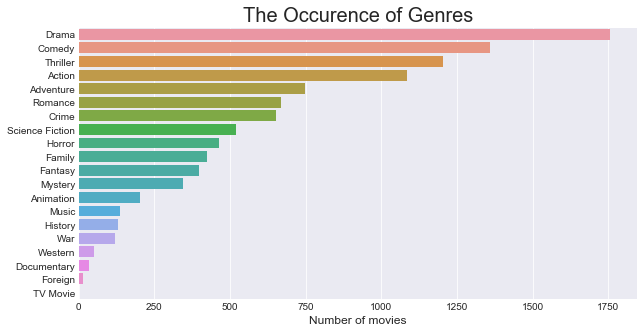

In [453]:
# Distribute movie genres
genre_count = distribution('genres')

# Change the shape from tupe to dataframe
genre_count = pd.DataFrame(genre_count)

# Plot
genre_count_plot = sns.barplot(x = genre_count[0], y = genre_count.index, data = genre_count)
genre_count_plot.figure.set_size_inches(10,5)

# Set title
genre_count_plot.set_title('The Occurence of Genres', fontsize = 20)

# x-label
genre_count_plot.set_xlabel('Number of movies', fontsize = 12)

We can see that __Drama__ is the most common genre in this dataset.

### 2) Which month is the released the most?

In [458]:
# Set release_date as index.
index_release_date = df_wrangled.set_index('release_date')

# Group the data by months.
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

# Count movies by months.
monthly_count = groupby_index['budget(USD)'].count()
monthly_count.index.names = ['release_month']

# Set monthly_count as dataframe
monthly_count = pd.DataFrame(monthly_count)
monthly_count.head(3)

,budget(USD)
release_month,
1,225
2,257
3,279


Text(0,0.5,'Number of Movies')

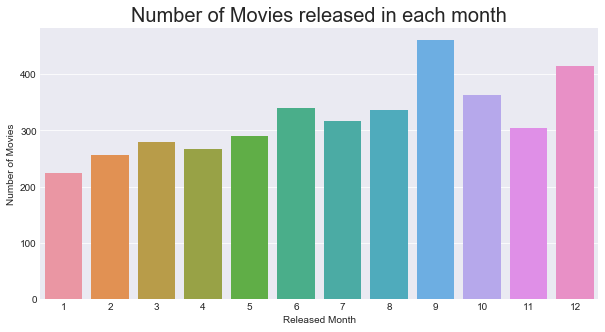

In [459]:
# Draw the plot
monthly_count_plot = sns.barplot(x = monthly_count.index, y = monthly_count['budget(USD)'], data = monthly_count)
monthly_count_plot.figure.set_size_inches(10,5)

# Set title
monthly_count_plot.axes.set_title('Number of Movies released in each month', fontsize = 20)

# Set x-label
monthly_count_plot.set_xlabel('Released Month')

# Set y-label
monthly_count_plot.set_ylabel('Number of Movies')

### 3) Which movie make the profit most?

In [461]:
# Add profit column to compare.
df_wrangled.insert(2, 'profit(USD)', df_wrangled['revenue(USD)'] - df_wrangled['budget(USD)'])
df_wrangled.head(1)

,budget(USD),revenue(USD),profit(USD),original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [462]:
# Find the most profitable movie and profit of it(Profit is in USD).
most_profitable = df_wrangled['profit(USD)'].idxmax()
df_wrangled.loc[most_profitable].iloc[3], df_wrangled.loc[most_profitable].iloc[2]

('Avatar', 2544505847)

### 4) Which movie make the revenue most?

In [463]:
# Find the biggest revenue movie and revenue of it(Profit is in USD).
most_revenue = df_wrangled['revenue(USD)'].idxmax()
df_wrangled.loc[most_revenue].iloc[3], df_wrangled.loc[most_revenue].iloc[1]

('Avatar', 2781505847)

### 5) How much is the average profit per movie by year?

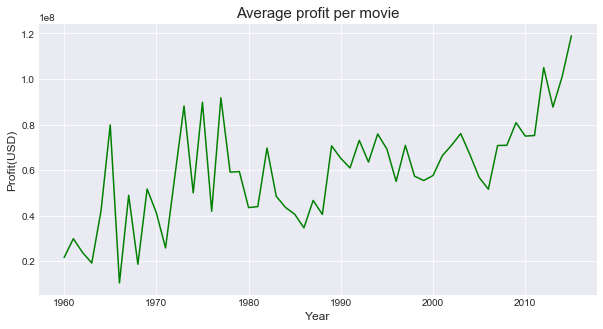

In [464]:
# Make the average profit of movie by year
ave_profit_year = df_wrangled.groupby('release_year')['profit(USD)'].mean()

# Convert the form to dataframe
pd.DataFrame(ave_profit_year)

# Plot size
plt.figure(figsize = (10, 5))

# x-label
plt.xlabel('Year', fontsize = 12)

# y-label
plt.ylabel('Profit(USD)', fontsize = 12)

# Set title
plt.title('Average profit per movie', fontsize = 15)

# Set histogram plot
plt.plot(ave_profit_year, color = 'g')

# Display with darkgrid
plt.show()

As time passes, the profit has a tendency that linearly increasing.

### 6) How is the runtime distributed?

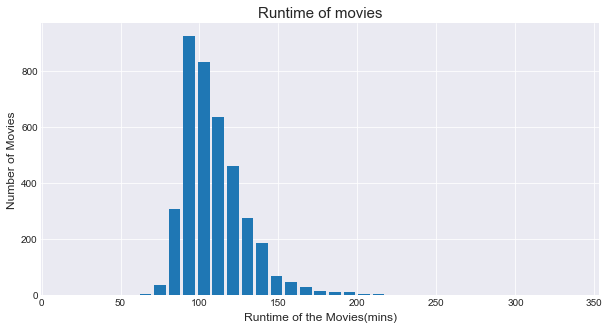

In [466]:
# Plot a histogram of movies's runtime

# Plot size
plt.figure(figsize = (10, 5))

# x-label
plt.xlabel('Runtime of the Movies(mins)', fontsize = 12)

# y-label
plt.ylabel('Number of Movies', fontsize = 12)

# Set title
plt.title('Runtime of movies', fontsize = 15)

# Set histogram plot
plt.hist(df_wrangled['runtime'], rwidth = 0.8, bins = 35) # 35 is about 10% of 338(longest runtime movie)

# Display with darkgrid
plt.show()
sns.set_style('darkgrid')

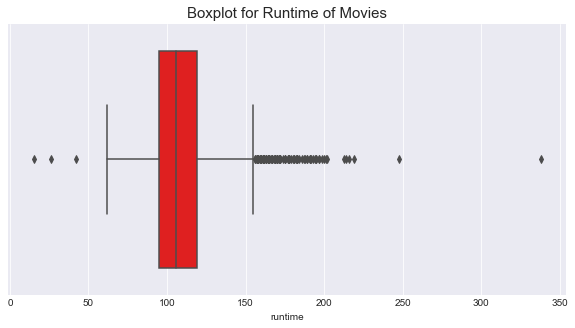

In [467]:
# Create a boxplot for runtime

# Plot size
plt.figure(figsize = (10, 5))

# Set title
plt.title('Boxplot for Runtime of Movies', fontsize = 15)

# Create a boxplot with seaborn
sns.boxplot(df_wrangled['runtime'], color = 'r')

#diplaying the plot
plt.show()

In [468]:
# Below is the distribution of runtime by numbers.
df_wrangled['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

***
## 5. Conclusion


1. Drama is the most common genre that about a half of the released movie include Drama genre.  
2. September is the most movies are released month. This is almost double of January.  
3. Avatar is the most profitable and got the highest revenue through the whole duration.
4. There seems a tendency that average profit per movie is going up.
5. If runtime data follows the Normal Distribution, 95% of movies' runtime is 89.30 mins to 129.14 mins.

***
## 6. Limitations
1) Some movies have are hardly convincible data. For movie 'Shattered Glass' as an example, revenue is __2 dollars__ whereas budget is __6,000,000__ dollars. This makes hard to caculate accurate profit per movie.  
2) After data wrangling only 3,853 out of 10,865 are remained. That is only about 35.4% of whole data. Hence this analysis may not reflect the properties pecfectly.